In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pybedtools
from amb import *
import seaborn  as sns
from amb import *
import numpy as np
import joblib

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
plt.rcParams['pdf.fonttype']=42

In [2]:
# mc_meta = pd.read_csv('/home/qzeng/project/aging/metadata/mC_META_230814.csv', index_col = 0)
# m3c_meta = pd.read_csv('/home/qzeng/project/aging/metadata/m3C_META_230814.csv', index_col = 0)

In [3]:
# m3c_cell_num = m3c_meta['CellType'].value_counts()
# mc_cell_num = mc_meta['CellType'].value_counts()

In [4]:
# cell_num_df = pd.concat([m3c_cell_num, mc_cell_num], axis = 1)
# cell_num_df.columns = ['Female','Male']
# cell_num_df = cell_num_df.dropna()

## load data

In [5]:
hyper_dmr_paths = glob.glob('mC_FILTER_DMR_BED/*.Hyper.aDMR.bed')
hypo_dmr_paths = glob.glob('mC_FILTER_DMR_BED/*.Hypo.aDMR.bed')

In [6]:
use_cts = joblib.load('/home/qzeng/project/aging/metadata/shared_use_cts')
use_cts = [ct.replace(' ','_').replace('/','') for ct in use_cts]

In [7]:
len(use_cts)

36

In [8]:
dmr_num = {}
dmr_length = {}
all_celltypes = []
for path in hyper_dmr_paths:
    mt = pathlib.Path(path).name.split('.')[0]
    if mt in use_cts:
        hyper_df = pd.read_csv(path, on_bad_lines='skip', sep = '\t', header = None,index_col = 3)
        hypo_df = pd.read_csv(f"mC_FILTER_DMR_BED/{mt}.Hypo.aDMR.bed", on_bad_lines='skip', sep = '\t', header = None,index_col = 3)

        hyper_df['length'] = hyper_df[2] - hyper_df[1]
        hypo_df['length'] = hypo_df[2] - hypo_df[1]

        hypo_mean = hypo_df['length'].mean()
        hyper_mean = hyper_df['length'].mean()
        mean = (hypo_mean+hyper_mean)/2

        all_celltypes.append(mt)
        dmr_num[mt] = [hyper_df.shape[0]+hypo_df.shape[0] ,hyper_df.shape[0],hypo_df.shape[0]]  
        dmr_length[mt] = [mean]  

In [9]:
dmr_num_df = pd.DataFrame(data = dmr_num, index = ['All aDMRs', 'Aging Hyper','Aging Hypo']).T
dmr_num_df = dmr_num_df.sort_values(by = 'All aDMRs', ascending = False).copy()
#dmr_num_df = dmr_num_df.drop(columns = ['All aDMRs'])
dmr_num_df.head()

,All aDMRs,Aging Hyper,Aging Hypo
OPC_NN,70516,35491,35025
Astro-NT_NN,58742,43960,14782
L23_IT_CTX_Glut,17998,757,17241
Microglia_NN,15929,9447,6482
LDT-PCG-CS_Gata3_Lhx1_Gaba,13622,7935,5687


In [11]:
dmr_num_df['All aDMRs'].mean()

8756.305555555555

In [14]:
dmr_num_df['All aDMRs'].std()

14422.933766984625

In [12]:
dmr_length_df = pd.DataFrame(data = dmr_length, index = ['Average Mean']).T
dmr_length_df.head()

,Average Mean
CA1-ProS_Glut,65.319460
CEA-BST_Gaba,63.668145
CA3_Glut,64.369323
DG_Glut,77.458292
MEA-BST_Gaba,65.955874


In [13]:
dmr_length_df['Average Mean'].mean()

81.6252393509857

In [15]:
dmr_length_df['Average Mean'].std()

22.972953510165993

In [11]:
# total_dmr = pd.DataFrame(dmr_num_df.sum(axis = 1))
# total_dmr['class'] = total_dmr.index.map(lambda x: x.split('-')[-1])
# dmr_num_ratio = total_dmr.groupby('class').sum()
# dmr_num_ratio = dmr_num_ratio.loc[['Gaba', 'Glut', 'NN', 'Sero']]

In [12]:
# palette_color = get_cell_class_palette()
# palette_color['Sero']= palette_color['Glut-Sero']

In [13]:
# labels =dmr_num_ratio.index 
# colors = [palette_color[label] for label in labels]

# plt.pie(dmr_num_ratio[0], labels=dmr_num_ratio.index, colors=colors, autopct='%.0f%%')
# plt.title('DMR Number Ratio')
# plt.savefig('dmr_number_ratio.pdf', dpi=300, bbox_inches='tight')
# #plt.savefig('figure/dmr_number_ratio.pdf', dpi=300, bbox_inches='tight')
# plt.show()

## plot cell type number

In [14]:
dmr_num_df['CellType'] = dmr_num_df.index
dmr_num_df['Class'] = dmr_num_df.index.map(lambda x: x.split('_')[-1])

nn_num_df = dmr_num_df[dmr_num_df['Class'] == 'NN']
neu_dum_df = dmr_num_df[dmr_num_df['Class'].isin(['Glut','Gaba','Sero'])]
dmr_num_df.head()

,All aDMRs,Aging Hyper,Aging Hypo,CellType,Class
OPC_NN,70516,35491,35025,OPC_NN,NN
Astro-NT_NN,58742,43960,14782,Astro-NT_NN,NN
L23_IT_CTX_Glut,17998,757,17241,L23_IT_CTX_Glut,Glut
Microglia_NN,15929,9447,6482,Microglia_NN,NN
LDT-PCG-CS_Gata3_Lhx1_Gaba,13622,7935,5687,LDT-PCG-CS_Gata3_Lhx1_Gaba,Gaba


In [15]:
dmr_length_df['CellType'] = dmr_length_df.index
dmr_length_df['Class'] = dmr_length_df.index.map(lambda x: x.split('_')[-1])

nn_length_df = dmr_length_df[dmr_length_df['Class'] == 'NN']
neu_length_df = dmr_length_df[dmr_length_df['Class'].isin(['Glut','Gaba','Sero'])]
dmr_length_df.head()

,Average Mean,CellType,Class
CA1-ProS_Glut,65.319460,CA1-ProS_Glut,Glut
CEA-BST_Gaba,63.668145,CEA-BST_Gaba,Gaba
CA3_Glut,64.369323,CA3_Glut,Glut
DG_Glut,77.458292,DG_Glut,Glut
MEA-BST_Gaba,65.955874,MEA-BST_Gaba,Gaba


In [16]:
nn_order = ['OPC_NN','Astro-NT_NN','Microglia_NN', 'Oligo_NN','Astro-TE_NN', ] #'VLMC-NN','CHOR-NN', 'Endo-NN'
nn_length_df = nn_length_df.loc[nn_order]
nn_num_df = nn_num_df.loc[nn_order]

In [17]:
palette_color = get_cell_class_palette()
palette_color['Sero'] = palette_color['Glut-Sero']

In [18]:
neuron_order = neu_dum_df.index

In [19]:
neu_length_df = neu_length_df.loc[neuron_order]

In [20]:
nn_length_df.shape[0], neu_length_df.shape[0]

(5, 31)

In [21]:
dmr_length_df= pd.concat([nn_length_df, neu_length_df])

In [22]:
dmr_num_df = pd.concat([nn_num_df,neu_dum_df])

## plot DMR length

In [23]:
dmr_length_df.shape

(36, 3)

In [24]:
dmr_length_df['CellType'] = dmr_length_df['CellType'].apply(lambda x: ' '.join(x.split('_')[:-1]))
dmr_num_df['CellType'] = dmr_num_df['CellType'].apply(lambda x: ' '.join(x.split('_')[:-1]))

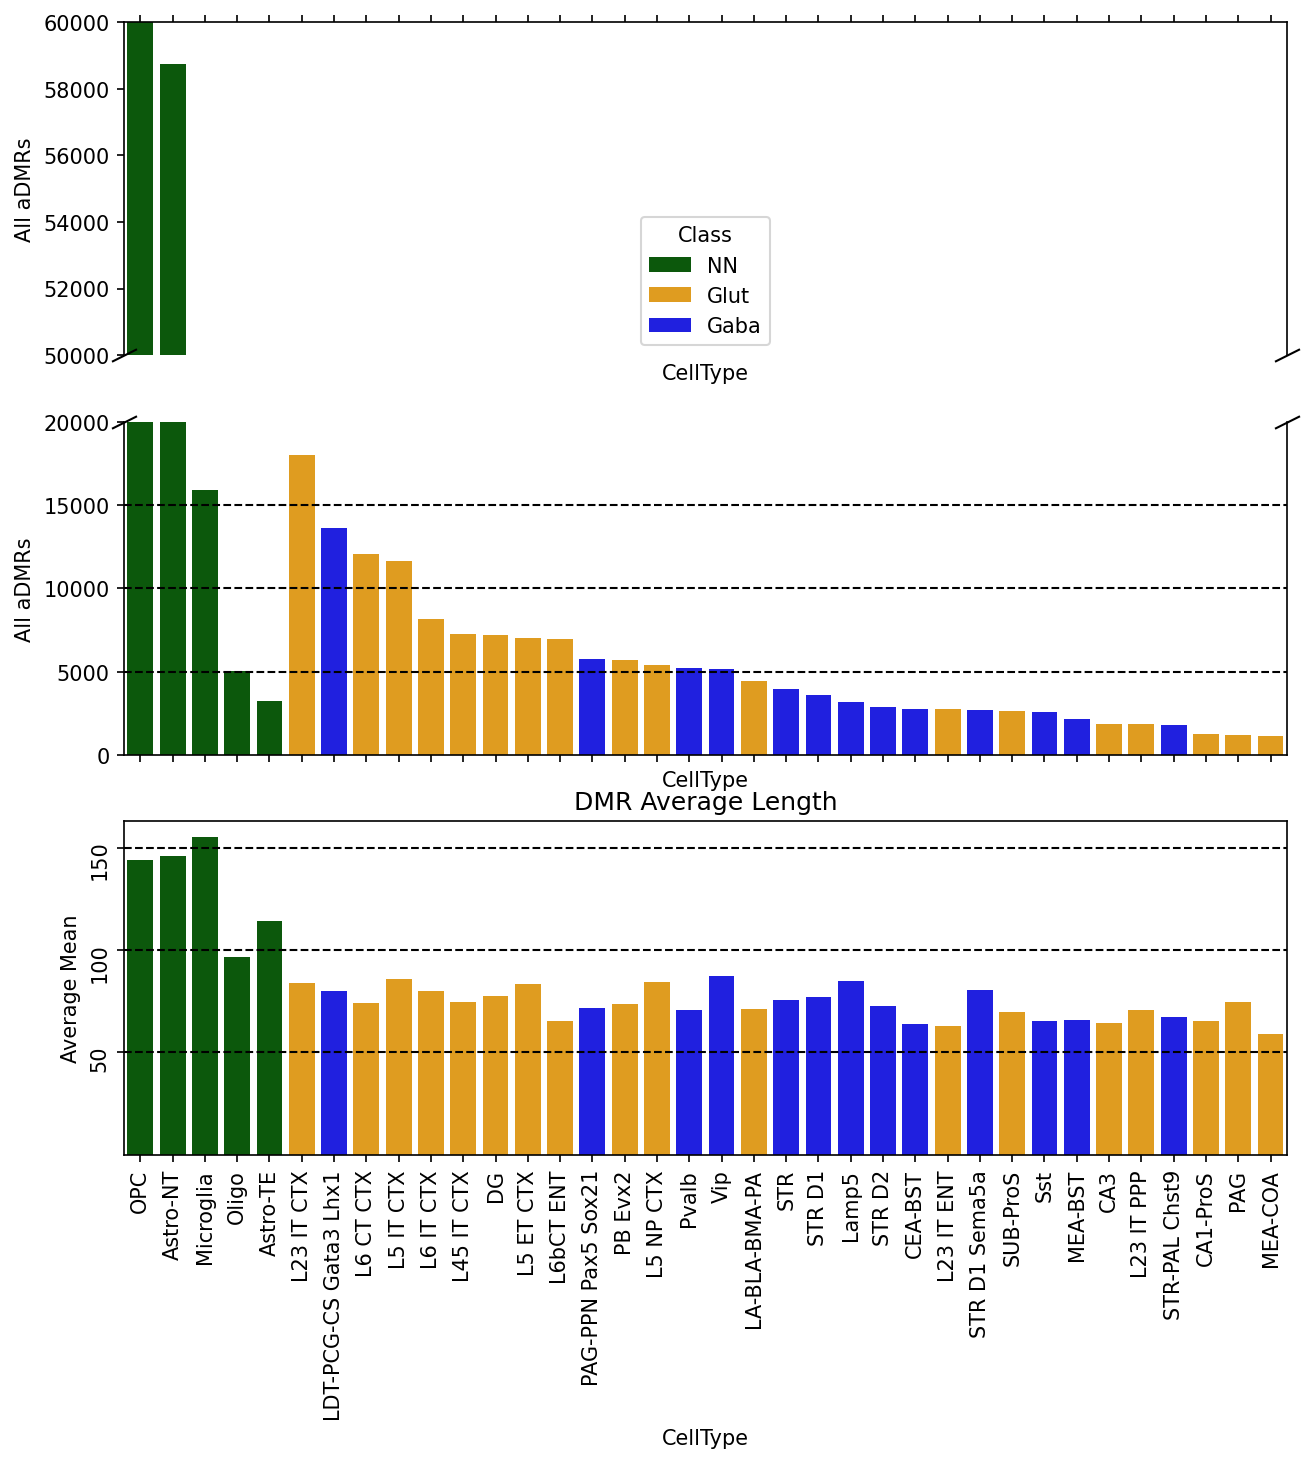

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10),dpi = 150, sharex=True)

sns.barplot(x='CellType', 
            y="All aDMRs", 
            hue = 'Class',
            palette = palette_color,
            data = dmr_num_df,
            ax = ax1,
           dodge=False)

sns.barplot(x='CellType', 
            y="All aDMRs", 
            hue = 'Class',
            palette = palette_color,
            data = dmr_num_df,
            ax = ax2,
           dodge=False)
ax2.get_legend().remove()

ax1.set_ylim(50000, 60000)  # outliers only
ax2.set_ylim(0,20000)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.axhline(y = 5000, ls = '--', c = 'black', lw = 1)
ax2.axhline(y = 10000, ls = '--', c = 'black', lw = 1)
ax2.axhline(y = 15000, ls = '--', c = 'black', lw = 1)

# ax1.set_xticks([])
# ax1.set_xticklabels([])
# ax2.set_xticks([])
# ax2.set_xticklabels([])

sns.barplot(x=dmr_length_df["CellType"], 
            y=dmr_length_df['Average Mean'], 
            hue = dmr_length_df['Class'],
            palette = palette_color,
            ax = ax3,
            dodge=False)
ax3.axhline(y = 50, ls = '--', c = 'black', lw = 1)
ax3.axhline(y = 100, ls = '--', c = 'black', lw = 1)
ax3.axhline(y = 150, ls = '--', c = 'black', lw = 1)
ax3.set_yticks([50,100,150])
ax3.set_yticklabels(['50','100','150'], rotation = 90)
ax3.set_title('DMR Average Length')
ax3.get_legend().remove()
plt.xticks(rotation=90)

fig.savefig(f"figure/dss-AgingMejorType.aDMR.Length.Number.pdf", bbox_inches = 'tight')
plt.show()

In [27]:
# fig = plt.figure(figsize=(10, 10), dpi=300, constrained_layout = True)
# gs = fig.add_gridspec(
#     2,2,  height_ratios=( 5,36), width_ratios=(1, 1), hspace=0, wspace=0
# )

# ax = fig.add_subplot(gs[0,0])
# sns.barplot(x=-nn_length_df['Average Mean'], 
#             y=nn_length_df["CellType"], 
#             hue = nn_length_df['Class'],
#             palette = palette_color,
#             ax = ax,
#            dodge=False)
# ax.axvline(x = -50, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = -100, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = -150, ls = '--', c = 'black', lw = 1)
# ax.set_xticks([-150,-100, -50])
# ax.set_xticklabels(['150','100', '50'], rotation = 90)
# ax.set_title('NN DMR Average Length')
# ax.get_legend().remove()

# ax = fig.add_subplot(gs[0,1])
# sns.barplot(x='All aDMRs', 
#             y="CellType", 
#             hue = 'Class',
#             palette = palette_color,
#             data = nn_num_df,
#             ax = ax,
#             dodge=False)

# ax.get_legend().remove()
# ax.axvline(x = 5000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 10000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 15000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 20000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 40000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 60000, ls = '--', c = 'black', lw = 1)
# ax.set_xticks([5000,10000, 15000,20000, 40000, 60000])
# ax.set_xticklabels(['5000','10000', '15000','20000', '40000', '60000'], rotation = 90)
# ax.set_title('NN DMR Number')

# ax = fig.add_subplot(gs[1, 0])
# sns.barplot(x=-neu_length_df['Average Mean'], 
#             y=neu_length_df["CellType"], 
#             hue = neu_length_df['Class'],
#             palette = palette_color,
#             ax = ax,
#            dodge=False)

# ax.axvline(x = -50, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = -100, ls = '--', c = 'black', lw = 1)
# ax.set_xticks([-100, -50])
# ax.set_xticklabels(['100', '50'], rotation = 90)
# ax.set_title('Neu. DMR Average Length')
# ax.get_legend().remove()

# ax = fig.add_subplot(gs[1,1])
# sns.barplot(x='All aDMRs', 
#             y="CellType", 
#             hue = 'Class',
#             palette = palette_color,
#             data = neu_dum_df,
#             ax = ax,
#            dodge=False)

# ax.axvline(x = 5000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 10000, ls = '--', c = 'black', lw = 1)
# ax.axvline(x = 15000, ls = '--', c = 'black', lw = 1)
# ax.set_xticks([5000,10000, 15000])
# ax.set_xticklabels(['5000','10000', '15000'], rotation = 90)
# ax.set_title('Neu. DMR Number')
# ax.get_legend().remove()

# #fig.savefig(f"figure/dss-AgingMejorType.aDMR.Length.Number.pdf", bbox_inches = 'tight')

## plot ratio

In [28]:
to_plot = dmr_num_df[['Aging Hyper','Aging Hypo']].copy()
to_plot = to_plot/to_plot.sum(axis = 1)[:,None]
to_plot = to_plot.sort_values('Aging Hyper')

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [29]:
to_plot['Class'] = to_plot.index.map(lambda x: x.split('_')[-1])

In [30]:
to_plot.head()

,Aging Hyper,Aging Hypo,Class
DG_Glut,0.028226,0.971774,Glut
L23_IT_CTX_Glut,0.042060,0.957940,Glut
L6_CT_CTX_Glut,0.064393,0.935607,Glut
L6bCT_ENT_Glut,0.067061,0.932939,Glut
STR_D1_Gaba,0.116234,0.883766,Gaba


In [32]:
# order by class
glut_cts = []
gaba_cts = []
nn_cts = []
for ct in to_plot.index:
    if ct.endswith('Glut'):glut_cts.append(ct)
    elif ct.endswith('Gaba'):gaba_cts.append(ct)
    elif ct.endswith('NN'):nn_cts.append(ct)

new_order = nn_cts+ glut_cts + gaba_cts
to_plot = to_plot.loc[new_order]

In [33]:
class_order = to_plot['Class'].tolist()
class_palette = get_cell_class_palette()
class_palette['PCG'] =class_palette['PAG-PCG']
class_palette['Sero'] =class_palette['Glut-Sero']

In [34]:
from matplotlib.colors import hex2color

class_colors = []
for _class in class_order:
    class_hex = class_palette[_class]
    class_colors.append(hex2color(class_hex))
class_colors = np.array(class_colors)

In [42]:
to_plot.index = to_plot.index.map(lambda x: ' '.join(x.split('_')[:-1]))

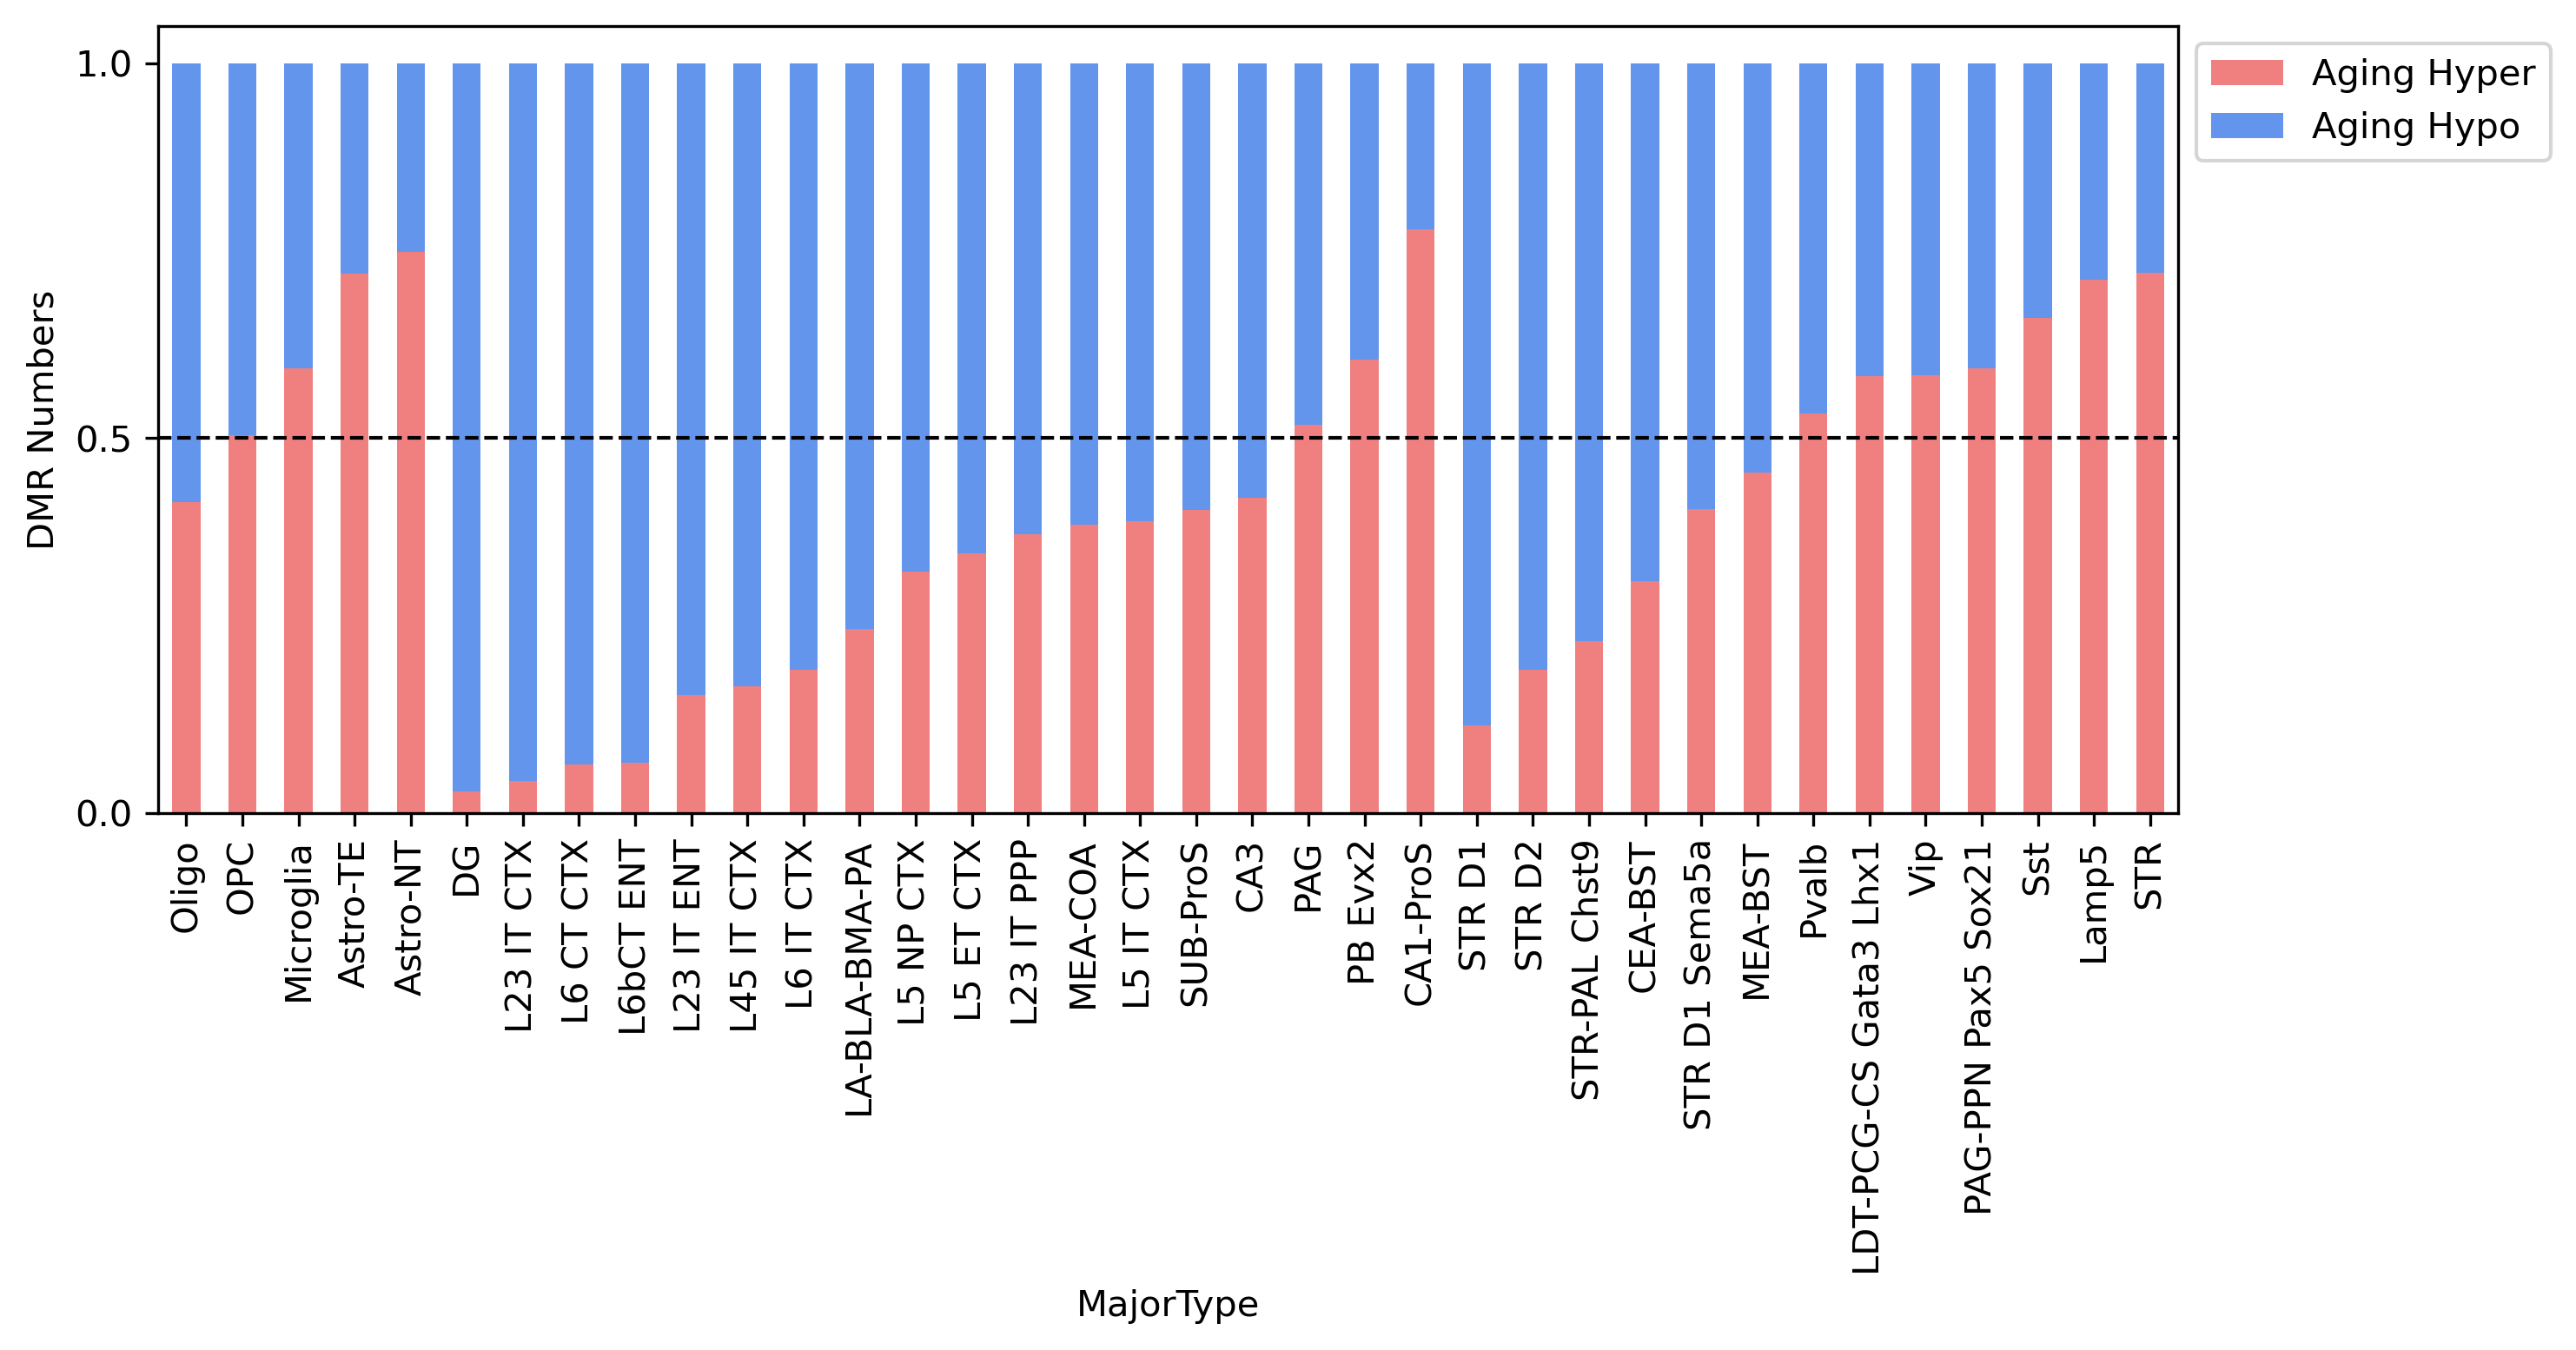

In [44]:
fig, ax = plt.subplots(figsize=(3,8), dpi = 300)

colors = ['lightcoral', 'cornflowerblue']
to_plot.plot(kind='bar', 
                stacked=True,
                figsize=(10, 4),
                 color=colors,
                 ax = ax
               )

ax.set_yticks([0,0.5,1.0])
plt.xlabel('MajorType')
plt.ylabel('DMR Numbers')
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.axhline(y=0.5, color='black', linestyle='--', linewidth = 1)
#ax.set_xticks([])

fig.savefig(f"figure/dss-AgingMajorType.aDMR.Hypo-Hyper.Ratio.pdf", bbox_inches = 'tight')

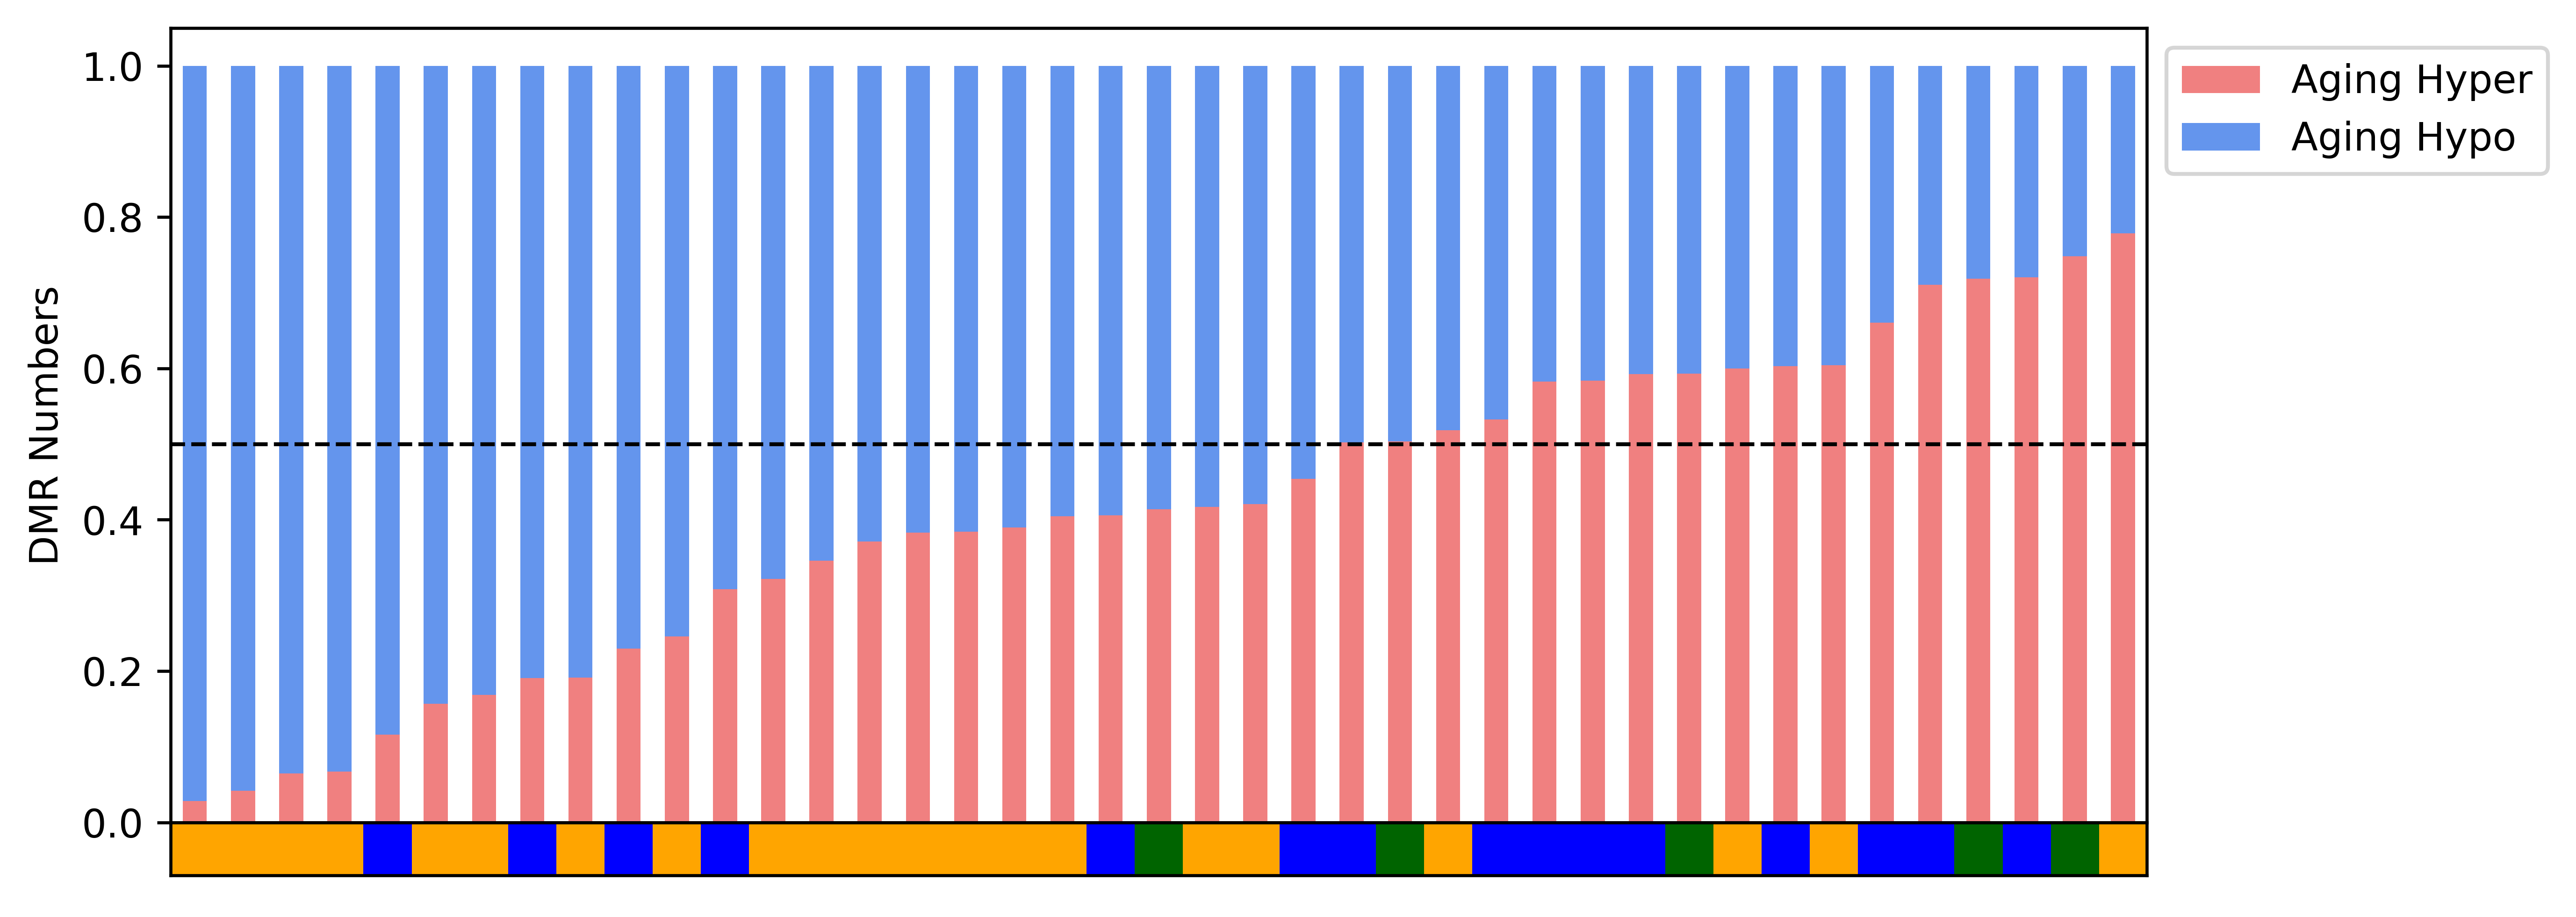

In [97]:
fig = plt.figure(figsize=(5, 2), dpi=600)
gs = fig.add_gridspec(
    2,2,  height_ratios=(15, 1), width_ratios=(1, 10), hspace=0, wspace=0
)

ax = fig.add_subplot(gs[0,1])
colors = ['lightcoral', 'cornflowerblue']
to_plot.plot(kind='bar', 
                stacked=True,
                figsize=(10, 4),
                 color=colors,
                 ax = ax
               )

plt.xlabel('MajorType')
plt.ylabel('DMR Numbers')
plt.legend( loc='upper left', bbox_to_anchor=(1, 1))
plt.axhline(y=0.5, color='black', linestyle='--', linewidth = 1)
ax.set_xticks([])

ax = fig.add_subplot(gs[1, 1])
im = ax.imshow(class_colors[None, :, :], aspect="auto")
ax.set(xticks=[], yticks=[], ylabel="", xlabel="")
fig.savefig(f"figure/with-class.dss-CellType.aDMR.Hypo-Hyper.Ratio.pdf", bbox_inches = 'tight')

## plot 

In [46]:
hypo_df.columns = ['chrom','start','end','dmr_id','8wk','9mo','18mo']
hyper_df.columns = ['chrom','start','end','dmr_id','8wk','9mo','18mo']
total_df.columns = ['chrom','start','end','dmr_id','8wk','9mo','18mo']

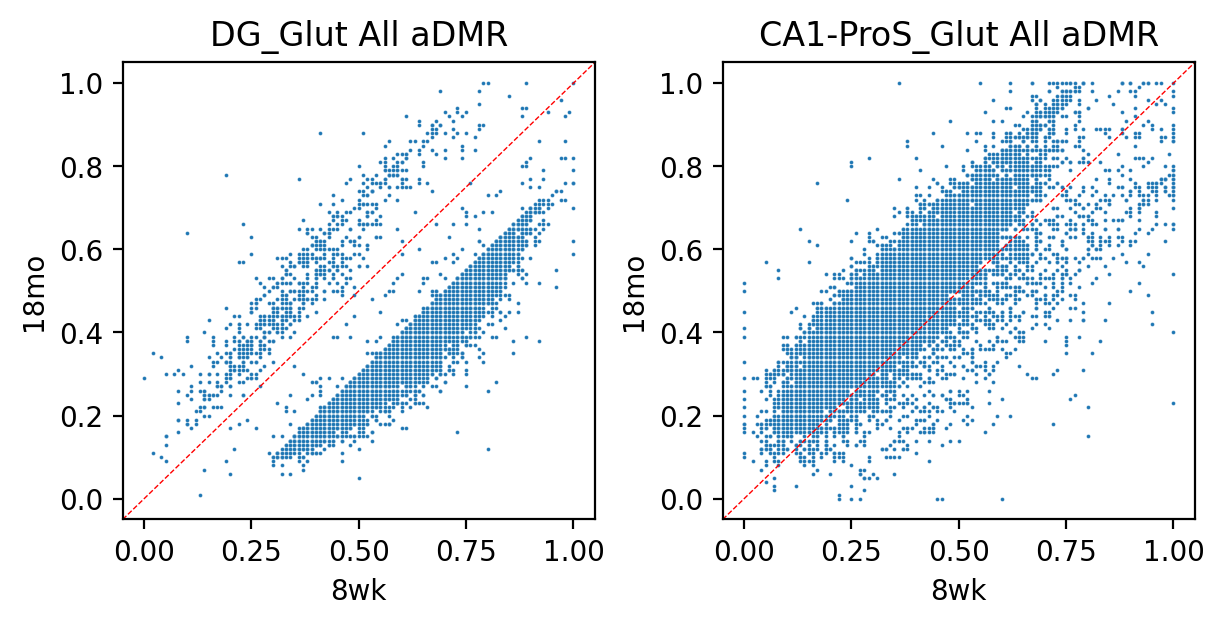

In [67]:
fig,axes = plt.subplots(figsize = (6,3),ncols = 2, dpi = 200, constrained_layout = True)

ax = axes[0]
example_ct = 'DG_Glut'
total_df = pd.read_csv(f'mC_FILTER_DMR_BED/{example_ct}.Total.aDMR.bed', sep = '\t', header = None)
total_df.columns = ['chrom','start','end','dmr_id','8wk','9mo','18mo']

sns.scatterplot(data=total_df, x="8wk", y="18mo", 
                ax = ax,
                s=  2, 
                #alpha =, 
                rasterized = True)
ax.axline((0, 0), (1, 1), color='red', lw = 0.5,linestyle='--')
ax.set_title(f'{example_ct} All aDMR')

ax = axes[1]
example_ct = 'CA1-ProS_Glut'
total_df = pd.read_csv(f'mC_FILTER_DMR_BED/{example_ct}.Total.aDMR.bed', sep = '\t', header = None)
total_df.columns = ['chrom','start','end','dmr_id','8wk','9mo','18mo']

sns.scatterplot(data=total_df, x="8wk", y="18mo", 
                ax = ax,
                s=  2, 
                #alpha =, 
                rasterized = True)
ax.axline((0, 0), (1, 1), color='red', lw = 0.5,linestyle='--')
ax.set_title(f'{example_ct} All aDMR')
fig.savefig(f"figure/sacatterplot-dss-AgingMajorType.aDMR.Hypo-Hyper.Ratio.pdf", bbox_inches = 'tight')

## plot aging dynamics

In [27]:
# dmr_paths = glob.glob('mC_FILTER_DMR_BED/*.DMR.bed')
# len(dmr_paths)

In [26]:
# ncols = 10
# nrows = 6

# fig, axes  = plt.subplots(ncols = ncols, nrows = nrows, figsize = (2*ncols,2*nrows),dpi = 200, constrained_layout=True)

# for path, ax in zip(dmr_paths, axes.ravel()):
#     tmpdf = pd.read_csv(path, on_bad_lines='skip', sep = '\t', header = None,index_col = 3)
#     mt = pathlib.Path(path).name.split('.')[0]
    
#     tmpdf['18mo-9mo'] = tmpdf[6] - tmpdf[5]
#     tmpdf['9mo-8wk'] = tmpdf[5] - tmpdf[4]

#     ax.hexbin(data = tmpdf, x = '18mo-9mo', y = '9mo-8wk', cmap=plt.cm.Blues)
#     ax.set(xlim=(-1, 1), ylim=(-1, 1), xlabel = 'mCG% diff:18mo-9mo', ylabel = 'mCG% diff:9mo-8wk')
#     ax.plot([-1, 1], [-1, 1], ls="--", c=".3")
#     ax.set_title(mt, loc = 'center', fontsize = 9)
#     ax.axvline(x=0, linewidth=1, color='r')
#     ax.axhline(y=0, linewidth=1, color='r')

    

## plot dmr length

In [29]:
# import numpy as np

In [30]:
# dmr_paths = glob.glob('mC_FILTER_DMR_BED/*.DMR.bed')

In [31]:
# ct_dmr_length = {}
# for path in dmr_paths:
#     df = pd.read_csv(path, on_bad_lines='skip', sep = '\t', header = None,index_col = 3)
#     mt = pathlib.Path(path).name.split('.')[0]
#     df['length'] = df[2] - df[1]
#     mean_dmr_length = df['length'].mean()
#     ct_dmr_length[mt] = mean_dmr_length
    

In [32]:
# np.mean(list(ct_dmr_length.values()))

In [33]:
# to_plot = pd.Series(ct_dmr_length).sort_values(ascending = False)
# to_plot = pd.DataFrame(to_plot)
# to_plot.columns = ['DMR length']
# to_plot['CellType'] = to_plot.index
# to_plot.head()

In [34]:
# celltype_palette = get_cell_type_palette()

In [35]:
# rename_celltype_palette = {}
# for celltype, color in celltype_palette.items():
#     new_celltype = celltype.replace(' ','_').replace('/','')
#     rename_celltype_palette[new_celltype] = color


In [28]:
# fig, ax = plt.subplots(figsize=(10, 6), dpi=200, constrained_layout = True)
# sns.barplot(data=to_plot, 
#             x='CellType', 
#             y='DMR length', 
#             palette = rename_celltype_palette,
#             ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.show()
